In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # jpg 등 의 이미지 파일 다루는 모듈


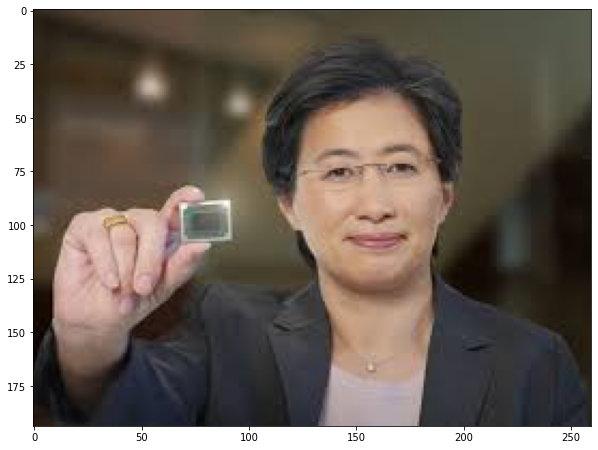

In [2]:
img = mpimg.imread('risa.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [35]:
import requests

client_id = "GYoAcBBUgag6SH0WTJsn"
client_secret = "wm1JRGqTkO"

url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('risa.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files=files, headers=headers)

In [36]:
import json
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys = False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 260,
            "height": 194
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 125,
                "y": 55,
                "width": 66,
                "height": 66
            },
            "landmark": {
                "leftEye": {
                    "x": 144,
                    "y": 76
                },
                "rightEye": {
                    "x": 169,
                    "y": 73
                },
                "nose": {
                    "x": 157,
                    "y": 92
                },
                "leftMouth": {
                    "x": 144,
                    "y": 105
                },
                "rightMouth": {
                    "x": 174,
                    "y": 104
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.975296
            },
            "age"

In [37]:
dict_sample = {'Name':'pinkwink', 'Age':'None',"Class":['beginner','blog']}

In [38]:
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [39]:
dict_sample.get('Name')

'pinkwink'

In [40]:
dict_sample.get('Age')

'None'

In [41]:
dict_sample.get('ABC')

In [42]:
customer = {
    'id':'0001',
    'name':'홍길동',
    'history':[
               {'date':'2019-03-01','log':True},
               {'date':'2019-03-02','log':False},
    
    ]
}


print(customer)
#json 형태 

{'id': '0001', 'name': '홍길동', 'history': [{'date': '2019-03-01', 'log': True}, {'date': '2019-03-02', 'log': False}]}


In [47]:
import requests

client_id = "GYoAcBBUgag6SH0WTJsn"
client_secret = "wm1JRGqTkO"

url = "https://openapi.naver.com/v1/vision/face"
files = {'image':open('risa.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)


In [48]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [49]:
detect_result['faces']

[{'age': {'confidence': 0.488158, 'value': '53~57'},
  'emotion': {'confidence': 0.959408, 'value': 'neutral'},
  'gender': {'confidence': 0.975296, 'value': 'male'},
  'landmark': {'leftEye': {'x': 144, 'y': 76},
   'leftMouth': {'x': 144, 'y': 105},
   'nose': {'x': 157, 'y': 92},
   'rightEye': {'x': 169, 'y': 73},
   'rightMouth': {'x': 174, 'y': 104}},
  'pose': {'confidence': 0.999166, 'value': 'frontal_face'},
  'roi': {'height': 66, 'width': 66, 'x': 125, 'y': 55}}]

In [50]:
detect_result['faces'][0]

{'age': {'confidence': 0.488158, 'value': '53~57'},
 'emotion': {'confidence': 0.959408, 'value': 'neutral'},
 'gender': {'confidence': 0.975296, 'value': 'male'},
 'landmark': {'leftEye': {'x': 144, 'y': 76},
  'leftMouth': {'x': 144, 'y': 105},
  'nose': {'x': 157, 'y': 92},
  'rightEye': {'x': 169, 'y': 73},
  'rightMouth': {'x': 174, 'y': 104}},
 'pose': {'confidence': 0.999166, 'value': 'frontal_face'},
 'roi': {'height': 66, 'width': 66, 'x': 125, 'y': 55}}

In [51]:
detect_result['faces'][0]['roi']

{'height': 66, 'width': 66, 'x': 125, 'y': 55}

In [52]:
detect_result['faces'][0]['gender']

{'confidence': 0.975296, 'value': 'male'}

In [53]:
detect_result['faces'][0]['age']

{'confidence': 0.488158, 'value': '53~57'}

In [54]:
detect_result['faces'][0]['emotion']

{'confidence': 0.959408, 'value': 'neutral'}

In [67]:
x ,y , w , h = detect_result['faces'][0]['roi'].values()
gender, gen_c = detect_result['faces'][0]['gender'].values()
emotion, emotion_c = detect_result['faces'][0]['emotion'].values()
age, age_c = detect_result['faces'][0]['age'].values()


In [68]:
annotation = gender + ':' + str(gen_c) + '\n' + emotion + ':' + str(emotion_c) + '\n'+ age + ":"+str(age_c)


In [69]:
print(annotation)

male:0.975296
neutral:0.959408
53~57:0.488158


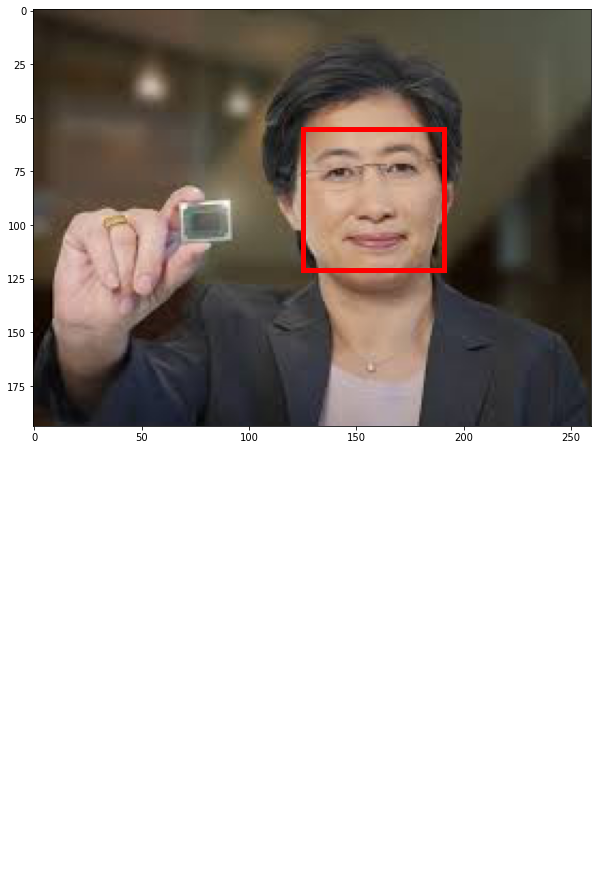

In [78]:
import matplotlib.patches as patches

img = mpimg.imread('risa.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y), w, h,
                              linewidth=5,
                              edgecolor= 'r',
                              facecolor='none')
ax.add_patch(rect_face)

plt.text(10,400,annotation, wrap=True, fontsize = 17, color='white')
plt.show()